## Package imports

In [1]:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.pyplot import MultipleLocator
import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import polyfit
import math
%matplotlib inline
import os

## Determine the number of neighbors

Text(0.5, 1.0, '$T_L,(Re,\\phi,r)=(10,15\\%,2)$')

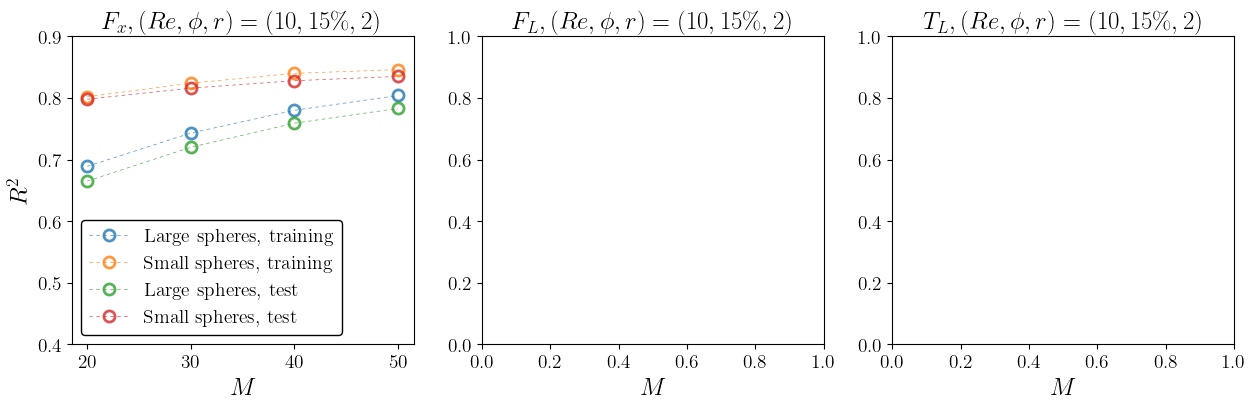

In [11]:
N_neighbors = np.array([20,30,40,50])
Large_train_score = np.array([0.689,0.743,0.780,0.804])
Small_train_score = np.array([0.802,0.824,0.840,0.846])
Large_test_score  = np.array([0.665,0.720,0.759,0.783])
Small_test_score  = np.array([0.798,0.816,0.828,0.835])

from matplotlib import rc
import matplotlib.font_manager
plt.rcParams["font.family"] = "Times New Roman"
rc('text', usetex=True)

plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('figure', titlesize=18)   # fontsize of the figure title

fig = plt.figure(figsize=(15,4))
ax1 = plt.subplot(131)
ax1.set_xlabel(r"$M$")
ax1.set_ylabel(r"$R^2$")
ax1.set_title(r"$F_x,(Re,\phi,r)=(10,15\%,2)$")
ax1.plot(N_neighbors,Large_train_score,'o--',fillstyle='none',markersize=8,markeredgewidth=2,
         dashes=(5,5),linewidth=0.5,alpha=0.8,zorder=200,label="Large spheres, training")
ax1.plot(N_neighbors,Small_train_score,'o--',fillstyle='none',markersize=8,markeredgewidth=2,
         dashes=(5,5),linewidth=0.5,alpha=0.8,zorder=200,label="Small spheres, training")
ax1.plot(N_neighbors,Large_test_score,'o--',fillstyle='none',markersize=8,markeredgewidth=2,
         dashes=(5,5),linewidth=0.5,alpha=0.8,zorder=200,label="Large spheres, test")
ax1.plot(N_neighbors,Small_test_score,'o--',fillstyle='none',markersize=8,markeredgewidth=2,
         dashes=(5,5),linewidth=0.5,alpha=0.8,zorder=200,label="Small spheres, test")
ax1.legend(loc=0,edgecolor='black',framealpha=1)
ax1.set_ylim(0.4,0.9)

ax2 = plt.subplot(132)
ax2.set_xlabel(r"$M$")
ax2.set_title(r"$F_L,(Re,\phi,r)=(10,15\%,2)$")

ax3 = plt.subplot(133)
ax3.set_xlabel(r"$M$")
ax3.set_title(r"$T_L,(Re,\phi,r)=(10,15\%,2)$")

## Huber Loss

<Figure size 640x480 with 0 Axes>

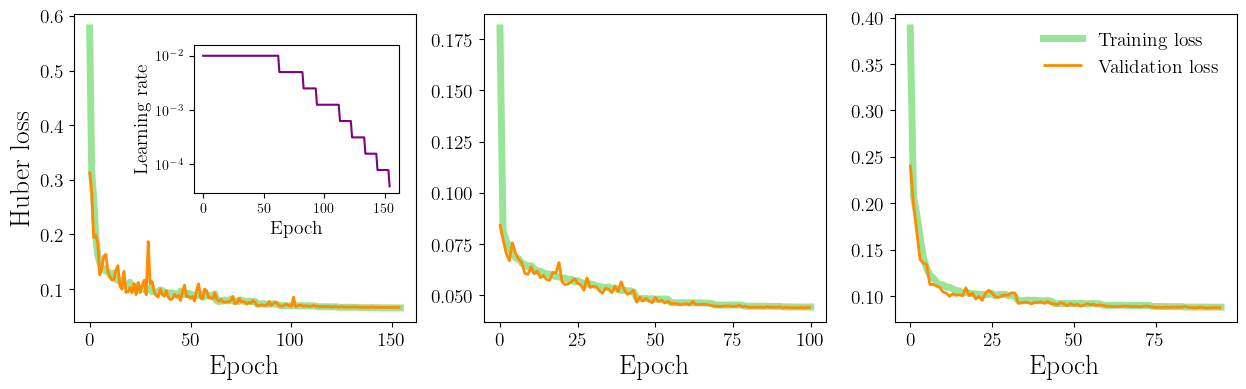

In [8]:
# free up memory from previous plots_________________
plt.close('all')
plt.clf()

from matplotlib import rc
import matplotlib.font_manager
plt.rcParams["font.family"] = "Times New Roman"
rc('text', usetex=True)

import os
os.chdir("/home/zihao/Documents/PhD/Post-Processing/3D/Bidisperse/Datasets/Paper_3")

epoch_drag = np.array([])
loss_drag = np.array([])
val_loss_drag = np.array([])
lr_drag = np.array([])

epoch_drag = np.load('Huber_loss_drag_epoch.npy')
loss_drag = np.load('Huber_loss_drag_train_loss.npy')
val_loss_drag = np.load('Huber_loss_drag_val_loss.npy')
lr_drag = np.load('Huber_loss_drag_lr.npy')

epoch_lift = np.load('Huber_loss_lift_epoch.npy')
loss_lift = np.load('Huber_loss_lift_train_loss.npy')
val_loss_lift = np.load('Huber_loss_lift_val_loss.npy')

epoch_torque = np.load('Huber_loss_torque_epoch.npy')
loss_torque = np.load('Huber_loss_torque_train_loss.npy')
val_loss_torque = np.load('Huber_loss_torque_val_loss.npy')

fig = plt.figure(figsize=(15,4))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

ax1.plot(epoch_drag,loss_drag,label=r"Training loss",lw=5,alpha=0.5,color='limegreen')
ax1.plot(epoch_drag,val_loss_drag,label=r"Validation loss",lw=2,dashes=(5,0),color='darkorange')
ax1.set_xlabel(r"Epoch",fontsize=20)
ax1.set_ylabel(r"Huber loss",fontsize=20)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
axins = inset_axes(ax1, width="120%", height="120%",bbox_to_anchor=(.35, .5, .5, .4),
                   bbox_transform=ax1.transAxes, loc=2, borderpad=0)
axins.plot(epoch_drag,lr_drag,color='purple')
axins.set_xlabel(r"Epoch",fontsize=14)
axins.set_ylabel(r"Learning rate",fontsize=14)
axins.set_yscale('log')
axins.set_yticks([1e-4,1e-3,1e-2],fontsize=12)
axins.set_ylim([3e-5,1.6e-2])
# axins.set_xticks([0,60,120],fontsize=12)
axins.minorticks_off()
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)

ax2.plot(epoch_lift,loss_lift,label=r"Training loss",lw=5,alpha=0.5,color='limegreen')
ax2.plot(epoch_lift,val_loss_lift,label=r"Validation loss",lw=2,dashes=(5,0),color='darkorange')
ax2.set_xlabel(r"Epoch",fontsize=20)
# ax2.set_ylabel(r"Huber loss",fontsize=20)
ax2.xaxis.set_tick_params(labelsize=14)
ax2.yaxis.set_tick_params(labelsize=14)

ax3.plot(epoch_torque,loss_torque,label=r"Training loss",lw=5,alpha=0.5,color='limegreen')
ax3.plot(epoch_torque,val_loss_torque,label=r"Validation loss",lw=2,dashes=(5,0),color='darkorange')
ax3.set_xlabel(r"Epoch",fontsize=20)
# ax2.set_ylabel(r"Huber loss",fontsize=20)
ax3.xaxis.set_tick_params(labelsize=14)
ax3.yaxis.set_tick_params(labelsize=14)

# ax1.legend(loc=0,edgecolor='none',prop={'size':14}, framealpha=1)
# ax2.legend(loc=0,edgecolor='none',prop={'size':14}, framealpha=1)
ax3.legend(loc=0,edgecolor='none',prop={'size':14}, framealpha=1)

# os.chdir("../../")
# fig.savefig("Plots/Huber_loss.pdf", bbox_inches="tight")